In [1]:
from src.autoencoders.vae import VariationalAutoEncoder
from src.utils.utils import get_training_and_validation_sets_gray_scale, get_test_set_gray_scale, loss_function, save_latent_vectors

c:\Users\giuli\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
c:\Users\giuli\anaconda3\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
X_train, Y_train, cX_train, X_val, Y_val, cX_val = get_training_and_validation_sets_gray_scale()
X_test, Y_test, cX_test = get_test_set_gray_scale()

In [3]:
vae = VariationalAutoEncoder(
        input_dim=[1, 64, 64],
        latent_dim=1280,
        n_filters=[4, 4],
        kernel_size=[32, 16],
        stride=[2, 2],
        padding=['same', 'same'],
        hidden_dims=[2560],
        activation='relu',
        learning_rate=0.001,
        dropout=0.4,
        alpha=0.3, # LeakyReLU alpha
        loss_function=loss_function,
        patience=10,
        metrics=['mse', 'mae']
)

In [4]:
vae.train(X_train, X_val, epochs=500, batch_size=128)

Epoch 1/100
34/34 [==============================] - 96s 3s/step - loss: 0.3570 - mse: 0.1132 - mae: 0.3201 - val_loss: 0.3352 - val_mse: 0.0997 - val_mae: 0.3007
Epoch 2/100
34/34 [==============================] - 94s 3s/step - loss: 0.3142 - mse: 0.0878 - mae: 0.2824 - val_loss: 0.2919 - val_mse: 0.0755 - val_mae: 0.2620
Epoch 3/100
34/34 [==============================] - 82s 2s/step - loss: 0.2698 - mse: 0.0649 - mae: 0.2427 - val_loss: 0.2463 - val_mse: 0.0540 - val_mae: 0.2211
Epoch 4/100
34/34 [==============================] - 94s 3s/step - loss: 0.2232 - mse: 0.0449 - mae: 0.2008 - val_loss: 0.1992 - val_mse: 0.0361 - val_mae: 0.1790
Epoch 5/100
34/34 [==============================] - 94s 3s/step - loss: 0.1762 - mse: 0.0289 - mae: 0.1585 - val_loss: 0.1519 - val_mse: 0.0221 - val_mae: 0.1368
Epoch 6/100
34/34 [==============================] - 91s 3s/step - loss: 0.1297 - mse: 0.0170 - mae: 0.1169 - val_loss: 0.1071 - val_mse: 0.0126 - val_mae: 0.0968
Epoch 7/100
34/34 [===

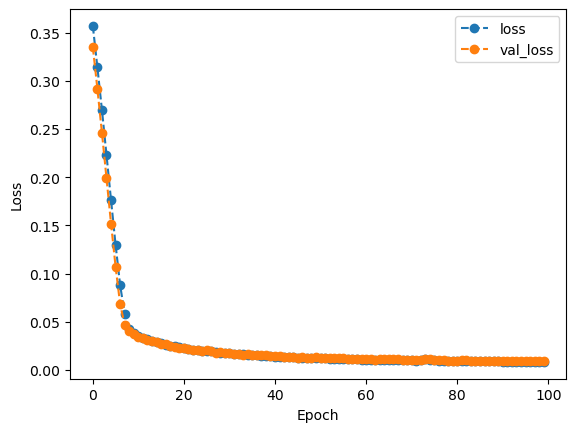

In [5]:
vae.visualize_loss()

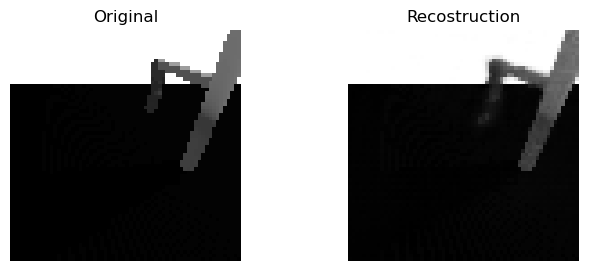

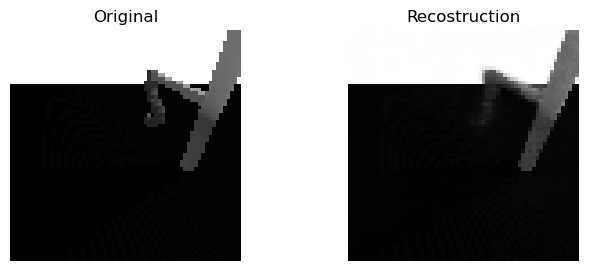

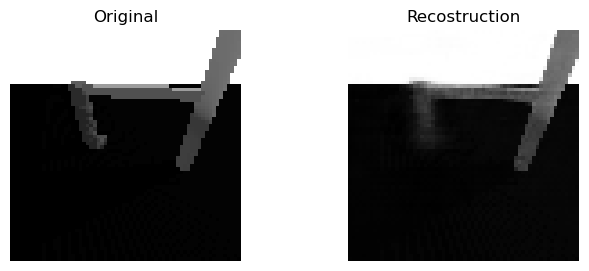

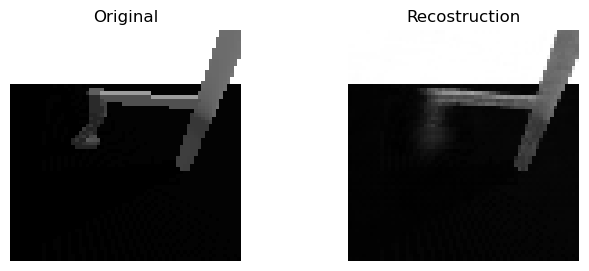

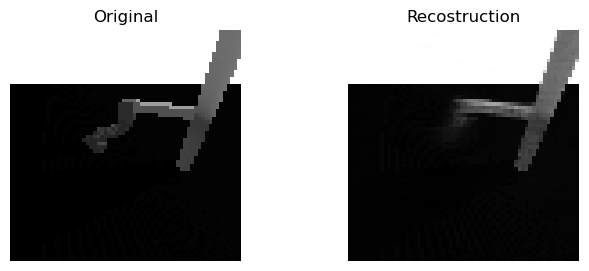

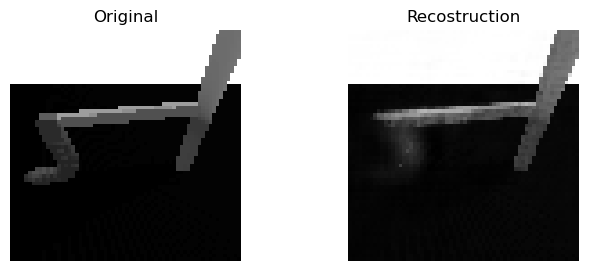

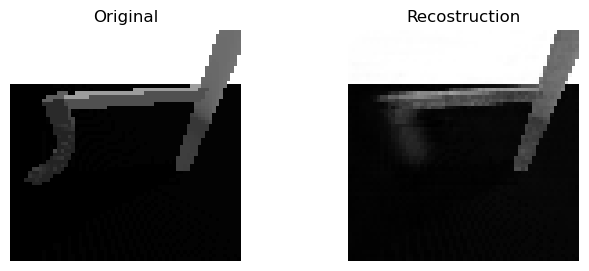

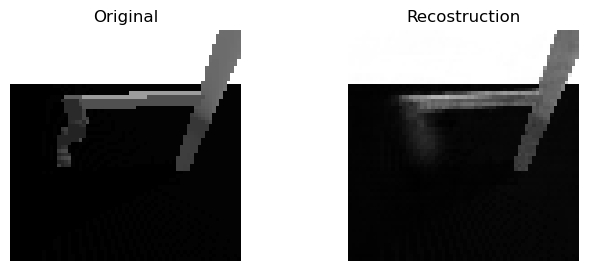

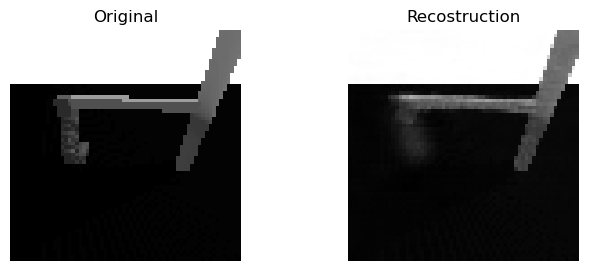

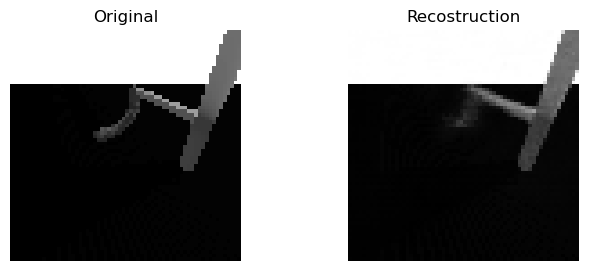

In [6]:
for i in range(10):
    vae.visualize_recostruction(X_train[36+i*47])

In [7]:
X_train_z = vae.compute_latent_vector(X_train)
X_val_z = vae.compute_latent_vector(X_val)
X_test_z = vae.compute_latent_vector(X_test)

69/69 [==============================] - 3s 44ms/step


In [8]:
save_latent_vectors(X_train_z, None, 'predictions/z_vae_gray_scale_train.pkl')
save_latent_vectors(X_val_z, None, 'predictions/z_vae_gray_scale_val.pkl')
save_latent_vectors(X_test_z, None, 'predictions/z_vae_gray_scale_test.pkl')

In [ ]:
# save history in a file
import pickle
with open('predictions/history_vae_gray_scale.pkl', 'wb') as file_pi:
    pickle.dump(vae.history, file_pi)